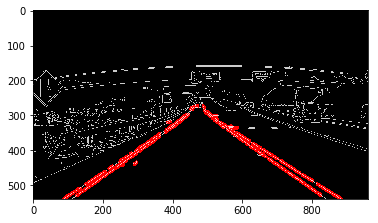

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(50,imshape[0]), (465, 270), (480, 270), (imshape[1]-50,imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 1     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 5 #minimum number of pixels making up a line
max_line_gap = 1    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)



0.704241067236
-0.781906986359
0.223707860973
0.208633662995


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,  14.,   1.,
         12.,   4.,   9.,  10.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([ -2.00000000e+00,  -1.90000000e+00,  -1.80000000e+00,
         -1.70000000e+00,  -1.60000000e+00,  -1.50000000e+00,
         -1.40000000e+00,  -1.30000000e+00,  -1.20000000e+00,
         -1.10000000e+00,  -1.00000000e+00,  -9.00000000e-01,
         -8.00000000e-01,  -7.00000000e-01,  -6.00000000e-01,
         -5.00000000e-01,  -4.00000000e-01,  -3.00000000e-01,
         -2.00000000e-01,  -1.00000000e-01,   1.77635684e-15,
          1.00000000e-01,   2.00000000e-01,   3.00000000e-01,
          4.00000000e-01,   5.00000000e-01,   6.00000000e-01,
          7.00000000e-01,   8.00000000e-01,   9.00000000e-01,
          1.00000000e+00,   1.10000000e+00,   1.20000000e+00,
          1.30000000e+00,   1.40000000e+00,   1.50

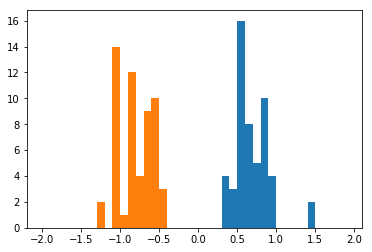

In [2]:
# gradients for detected lines
gradients = (lines[:,:,3] - lines[:,:,1]) / (lines[:,:,2]-lines[:,:,0])
pIndx = np.logical_and(abs(gradients)>0.25, abs(gradients)<2)
ppIndx = np.logical_and(gradients>0, pIndx)
npIndx = np.logical_and(gradients<0, pIndx)

print (np.mean(gradients[ppIndx]))
print (np.mean(gradients[npIndx]))

print (np.std(gradients[ppIndx]))
print (np.std(gradients[npIndx]))

plt.hist(gradients[ppIndx], bins=np.arange(-2,2,0.1))
plt.hist(gradients[npIndx], bins=np.arange(-2,2,0.1))

-47.8151575126
643.279027974
127.375657206
68.7219555731


(array([ 2.,  2.,  0.,  2.,  5.,  4.,  5.,  3.,  2.,  4.,  3.,  4.,  3.,
         2.,  6.,  3.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 514.  ,  527.37,  540.74,  554.11,  567.48,  580.85,  594.22,
         607.59,  620.96,  634.33,  647.7 ,  661.07,  674.44,  687.81,
         701.18,  714.55,  727.92,  741.29,  754.66,  768.03,  781.4 ,
         794.77,  808.14,  821.51,  834.88,  848.25]),
 <a list of 25 Patch objects>)

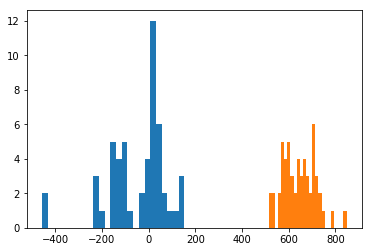

In [3]:
#biases for detected lines

print (np.mean(lines[ppIndx,3] - gradients[ppIndx]*lines[ppIndx,2]))
print (np.mean(lines[npIndx,3] - gradients[npIndx]*lines[npIndx,2]))

print (np.std(lines[ppIndx,3] - gradients[ppIndx]*lines[ppIndx,2]))
print (np.std(lines[npIndx,3] - gradients[npIndx]*lines[npIndx,2]))

#plt.hist(lines[pIndx,3] - gradients[pIndx]*lines[pIndx,2], bins=100)
plt.hist(lines[ppIndx,3] - gradients[ppIndx]*lines[ppIndx,2], bins=25)
plt.hist(lines[npIndx,3] - gradients[npIndx]*lines[npIndx,2], bins=25)

In [55]:
import time
alines = lines[pIndx,:]

start = time.time()
# naive implementation
np.sqrt(np.power(lines[pIndx,2]-lines[pIndx,0], 2) + np.power(lines[pIndx,3] - lines[pIndx,1], 2))

elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

start = time.time()
# numpy
np.linalg.norm(np.c_[alines[:,2] - alines[:,0], alines[:,3]-alines[:,1]], 2, 1)

elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

elapsed_time:0.00026297569274902344[sec]
elapsed_time:0.00045299530029296875[sec]


(array([ 72.,  17.,   7.,   2.,   1.,   0.,   3.,   2.,   1.,   2.]),
 array([ 0.00371239,  0.00785747,  0.01200255,  0.01614763,  0.02029271,
         0.02443779,  0.02858287,  0.03272795,  0.03687303,  0.0410181 ,
         0.04516318]),
 <a list of 10 Patch objects>)

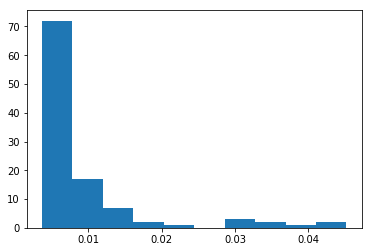

In [110]:
line_length = np.sqrt(np.power(lines[pIndx,2]-lines[pIndx,0], 2) + np.power(lines[pIndx,3] - lines[pIndx,1], 2))
weight_l = line_length / line_length.sum()
plt.hist(weight_l)

(array([  9.,  15.,  12.,  13.,  14.,  16.,   8.,   9.,   5.,   6.]),
 array([ 0.00424227,  0.00538425,  0.00652622,  0.00766819,  0.00881016,
         0.00995213,  0.01109411,  0.01223608,  0.01337805,  0.01452002,
         0.015662  ]),
 <a list of 10 Patch objects>)

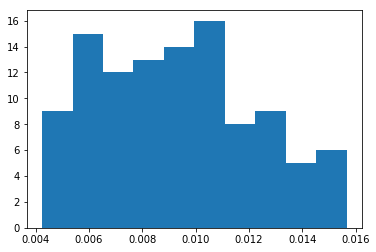

In [111]:
ymax2 = np.power(lines[pIndx][:,[1,3]].max(axis=1), 2)
weight_y = ymax2 / ymax2.sum()
plt.hist(weight_y)

1.0


(array([ 37.,  43.,  16.,   2.,   0.,   2.,   2.,   1.,   3.,   1.]),
 array([ 0.00460671,  0.0071873 ,  0.00976788,  0.01234847,  0.01492906,
         0.01750965,  0.02009024,  0.02267083,  0.02525141,  0.027832  ,
         0.03041259]),
 <a list of 10 Patch objects>)

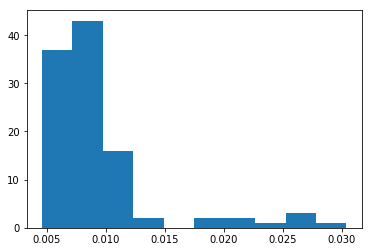

In [113]:
weight = weight_l + weight_y
weight = weight / weight.sum()
print(weight.sum())
plt.hist(weight)

In [119]:
lines[pIndx]

array([[383, 341, 399, 329],
       [579, 349, 602, 362],
       [257, 427, 270, 417],
       [401, 329, 435, 302],
       [646, 405, 661, 414],
       [498, 290, 506, 296],
       [161, 491, 197, 466],
       [252, 438, 262, 433],
       [666, 403, 674, 409],
       [347, 373, 352, 367],
       [218, 452, 226, 448],
       [780, 498, 824, 528],
       [719, 436, 725, 441],
       [624, 390, 642, 401],
       [677, 411, 685, 415],
       [771, 470, 800, 487],
       [199, 466, 206, 460],
       [730, 463, 767, 488],
       [336, 374, 342, 368],
       [142, 517, 190, 484],
       [597, 369, 604, 375],
       [497, 294, 546, 334],
       [389, 342, 396, 336],
       [263, 431, 268, 429],
       [825, 504, 881, 538],
       [379, 348, 393, 338],
       [398, 335, 408, 329],
       [423, 317, 440, 301],
       [487, 274, 491, 280],
       [ 90, 537, 134, 509],
       [523, 310, 528, 315],
       [125, 530, 132, 524],
       [611, 379, 616, 384],
       [691, 436, 711, 449],
       [736, 4